In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from IPython.display import display
from pandas import ExcelWriter

## Load the Data

In [5]:
wind_data = pd.read_csv('la-haute-borne-data-2013-2016.csv',sep=';')

In [6]:
# Defining the columns to keep
cols_2_keep = ['Date_time', 'P_avg', 'P_min', 'P_max', 'P_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', \
               'Ws2_max', 'Ws2_std', 'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std']

# process the data
turbines = {}
index = 1
for name in wind_data.Wind_turbine_name.unique():
    # Splitting data based on wind turbine (1-4)
    turbine_name = 'turbine_{}'.format(index)
    turbine_data = wind_data.loc[wind_data['Wind_turbine_name'] == name]
    
    # Cleaning each turbine data by removing Nan's in the wind speed column
    turbine_data_clean = turbine_data[np.isfinite(turbine_data['Ws1_avg'])]
    turbines[turbine_name] = turbine_data_clean.loc[:, cols_2_keep]
    index += 1

In [7]:
# Converting date_time column to datetime variable and picking out day,month,hour,minute and year
for key in turbines.keys():
    turbines[key]['Date_time'] = pd.to_datetime(turbines[key]['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
    turbines[key]['Day'] = turbines[key]['Date_time'].dt.day;
    turbines[key]['Month'] = turbines[key]['Date_time'].dt.month;
    turbines[key]['Hour'] = turbines[key]['Date_time'].dt.hour;
    turbines[key]['Minute'] = turbines[key]['Date_time'].dt.minute;
    turbines[key]['Year'] = turbines[key]['Date_time'].dt.year;

# Sorting the rows based on the date time
for key in turbines.keys():
    turbine_sorted = turbines[key].sort_values(by = 'Date_time')
    turbines[key] = turbine_sorted.set_index('Date_time')
    
turbines['turbine_1'].head()

,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [8]:
# use the intersection of time of all 4 turbines and keep the common times
idx = turbines['turbine_1'].index.intersection(turbines['turbine_2'].index)
idx2 = turbines['turbine_3'].index.intersection(idx)
idx3 = turbines['turbine_4'].index.intersection(idx2)

for key in turbines.keys():
    turbines[key] = turbines[key].loc[idx3]
    
print (len(turbines['turbine_1']))
print (len(turbines['turbine_2']))
print (len(turbines['turbine_3']))
print (len(turbines['turbine_4']))
turbines['turbine_1'].head()

207789
207789
207789
207789


,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [9]:
list(turbines['turbine_1'])

['P_avg',
 'P_min',
 'P_max',
 'P_std',
 'Ws1_avg',
 'Ws1_min',
 'Ws1_max',
 'Ws1_std',
 'Ws2_avg',
 'Ws2_min',
 'Ws2_max',
 'Ws2_std',
 'Ws_avg',
 'Ws_min',
 'Ws_max',
 'Ws_std',
 'Day',
 'Month',
 'Hour',
 'Minute',
 'Year']

In [10]:
np.any(np.isnan(turbines['turbine_4']))

False

# Ploting the Power Curves

Text(0,0.5,'Power (P_avg)')

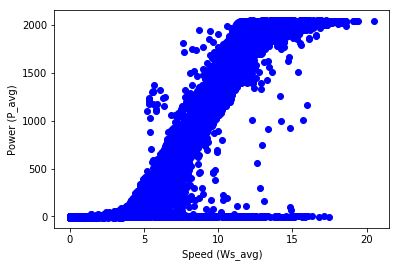

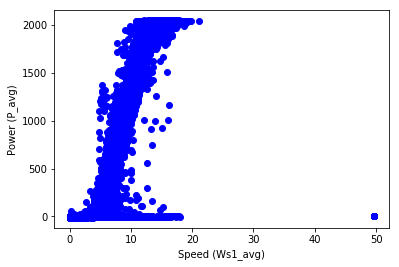

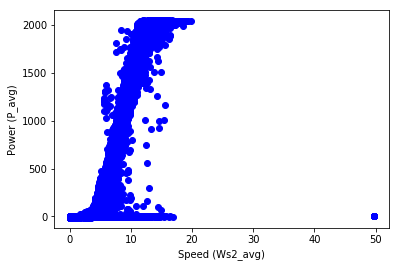

In [11]:
# Turbine 1
plt.figure(1)
plt.plot(turbines['turbine_1'].Ws_avg, turbines['turbine_1'].P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbines['turbine_1'].Ws1_avg, turbines['turbine_1'].P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbines['turbine_1'].Ws2_avg, turbines['turbine_1'].P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

Text(0,0.5,'Power (P_avg)')

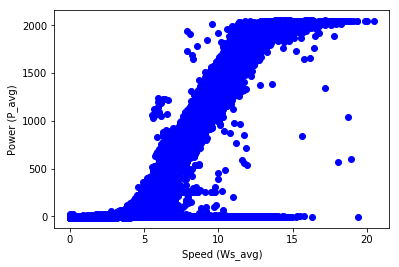

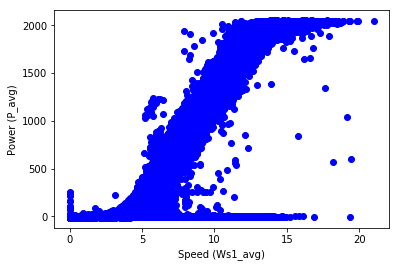

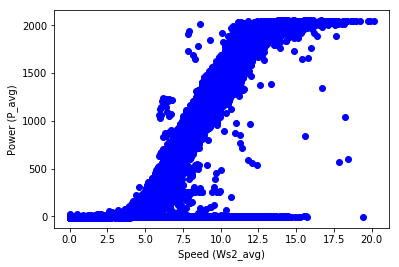

In [12]:
# Turbine 2
plt.figure(1)
plt.plot(turbines['turbine_2'].Ws_avg, turbines['turbine_2'].P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbines['turbine_2'].Ws1_avg, turbines['turbine_2'].P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbines['turbine_2'].Ws2_avg, turbines['turbine_2'].P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

Text(0,0.5,'Power (P_avg)')

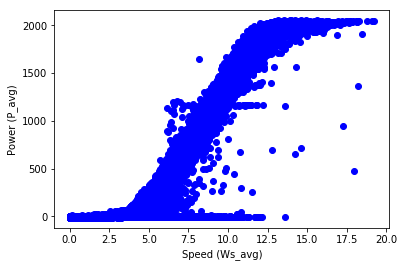

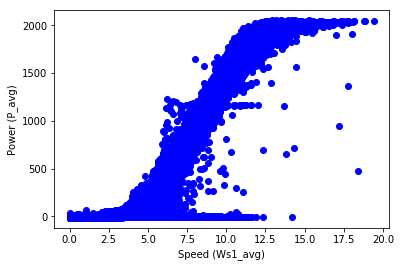

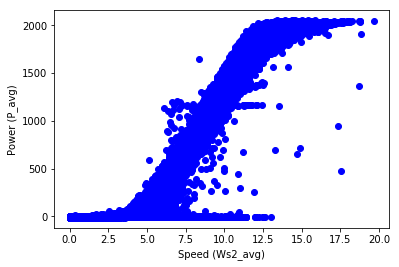

In [14]:
# Turbine 3
plt.figure(1)
plt.plot(turbines['turbine_3'].Ws_avg, turbines['turbine_3'].P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbines['turbine_3'].Ws1_avg, turbines['turbine_3'].P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbines['turbine_3'].Ws2_avg, turbines['turbine_3'].P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

Text(0,0.5,'Power (P_avg)')

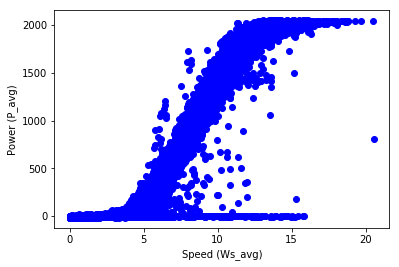

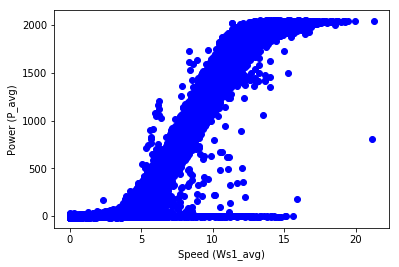

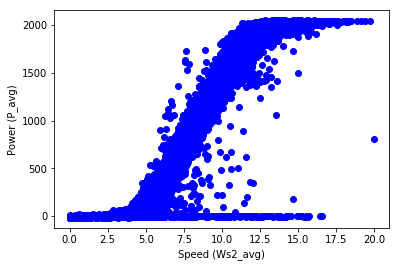

In [15]:
# Turbine 4
plt.figure(1)
plt.plot(turbines['turbine_4'].Ws_avg, turbines['turbine_4'].P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbines['turbine_4'].Ws1_avg, turbines['turbine_4'].P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbines['turbine_4'].Ws2_avg, turbines['turbine_4'].P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

# Data Filtering

In [18]:
turbine_4_ws = np.array(turbines['turbine_4'].Ws_avg)
np.var(turbine_4_ws)

6.422622368650482

# Wind Speed Prediction

Mean squared error: 0.47


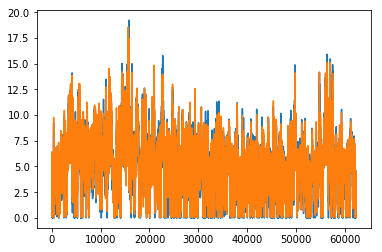

In [25]:
# Getting X vector from turbine 1 data sequentially

x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data

y_turb_3_train = turbines['turbine_3'][0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['Ws_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = turbines['turbine_3'][145452:]
y_turb_3_test = y_turb_3_test.loc[:,['Ws_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
J:\My_tools\Anaconda3\envs\tensorflow\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
